### Data Information: 
1. SNo - Serial number
2. ObservationDate - Date of the observation in MM/DD/YYYY
3. Country/Region - Country of observation
4. Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised)
5. Confirmed - Cumulative number of confirmed cases till that date
6. Deaths - Cumulative number of of deaths till that date
7. Recovered - Cumulative number of recovered cases till that date

### Problem Statement Guide:
1. Analyse the data and develop a strong data story. Dont be limited to the data provided. Feel free to use any other publicly available datasets to support or reinforce your findings. Some sample hypothesis/questions could be:
(What is the average recovery time, and has it changed over time and is there a way to predict the recovery time?
Is there any seasonality pattern that is emerging from the data?
Is there any statistically different behavior observed in any location across different point in time?)
2. Don't be limited to the above questions. Feel free to come up with your own hypothesis. 
3. We are not focusing on answers alone. We would also look at your ability to wrangle data, creativity in approaching the problem, organization of the work.

## Libraries required

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import math

from datetime import datetime

## Initial Data Preparation

### Read Data from 3 Separate Sheets
1. confirmed: "Confirmed cases" sheet
2. deaths: "Deaths" sheet
3. recovered: "Recovered" sheet

In [3]:
confirmed = pd.read_excel("Technical Assessment_Data Analyst (Part 1).xlsx", "Confirmed cases")
deaths = pd.read_excel("Technical Assessment_Data Analyst (Part 2).xlsx", "Deaths")
recovered = pd.read_excel("Technical Assessment_Data Analyst (Part 2).xlsx", "Recovered")

In [4]:
confirmed.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0


In [5]:
deaths.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Deaths
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0


In [6]:
recovered.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0


In [7]:
print(confirmed.shape)
print(deaths.shape)
print(recovered.shape)

(306429, 6)
(306429, 6)
(306429, 6)


### Merge on SNo
- Based on shape, there is a similar number of records which allows easy merging on SNo

In [8]:
combined = pd.merge(confirmed, deaths[['SNo','Deaths']], on = "SNo", how = "left")
combined = pd.merge(combined, recovered[['SNo','Recovered']], on = "SNo", how = "left")

In [9]:
combined.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


### Convert "ObservationDate" to standardized string column and rename to just "Date"
- Realised the "ObservationDate" column takes up multiple formats
- Standardized string column enable easier plotting later on
- "Date" instead of "ObservationDate" saves time in typing

In [10]:
def date_cleaner(obs_date):
    if type(obs_date) != str:
        obs_date = datetime.strptime(obs_date.strftime("%m/%d/%Y"), "%d/%m/%Y")
        return obs_date
    else:
        obs_date = datetime.strptime(obs_date, "%m/%d/%Y")
        return obs_date

In [11]:
combined["Date"] = combined["ObservationDate"].apply(lambda x: date_cleaner(x))
combined = combined[["SNo", "Date", "Province/State", "Country/Region", "Confirmed", "Deaths", "Recovered"]]

In [12]:
combined.head()

,SNo,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,1,0,0
1,2,2020-01-22,Beijing,Mainland China,14,0,0
2,3,2020-01-22,Chongqing,Mainland China,6,0,0
3,4,2020-01-22,Fujian,Mainland China,1,0,0
4,5,2020-01-22,Gansu,Mainland China,0,0,0


### Calculate Active Cases
- Could be relevant for analysis later on

In [13]:
combined.loc[:,"Active"] = combined["Confirmed"] - combined["Recovered"] - combined["Deaths"]

In [14]:
combined.head()

,SNo,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
0,1,2020-01-22,Anhui,Mainland China,1,0,0,1
1,2,2020-01-22,Beijing,Mainland China,14,0,0,14
2,3,2020-01-22,Chongqing,Mainland China,6,0,0,6
3,4,2020-01-22,Fujian,Mainland China,1,0,0,1
4,5,2020-01-22,Gansu,Mainland China,0,0,0,0


In [15]:
combined.tail()

,SNo,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered,Active
306424,306425,2021-05-29,Zaporizhia Oblast,Ukraine,102641,2335,95289,5017
306425,306426,2021-05-29,Zeeland,Netherlands,29147,245,0,28902
306426,306427,2021-05-29,Zhejiang,Mainland China,1364,1,1324,39
306427,306428,2021-05-29,Zhytomyr Oblast,Ukraine,87550,1738,83790,2022
306428,306429,2021-05-29,Zuid-Holland,Netherlands,391559,4252,0,387307


## Exploratory Data Analysis based on end day (2021-05-29)
1. Which countries have the most/least confirmed cases?
2. Which countries have the highest/lowest number of deaths?

In [16]:
combined_final = combined.groupby(["Date", "Country/Region"])[["Confirmed", "Deaths", "Recovered", "Active"]].sum()

In [17]:
rows = []
for i in range(-195, 0):
    rows.append(i)

combined_29_5 = combined_final.iloc[rows]

In [18]:
combined_29_5.sort_values(by = "Confirmed").iloc[[-1,-2,-3,-4,-5]]

Confirmed  Deaths  Recovered    Active
Date       Country/Region                                        
2021-05-29 US               33251939  594306          0  32657633
           India            27894800  325972   25454320   2114508
           Brazil           16471600  461057   14496224   1514319
           France            5719877  109518     390878   5219481
           Turkey            5235978   47271    5094279     94428

In [19]:
combined_29_5.sort_values(by = "Confirmed").iloc[[0, 1,2, 3, 4]]

Confirmed  Deaths  Recovered  Active
Date       Country/Region                                        
2021-05-29 Micronesia                1       0          1       0
           Kiribati                  2       0          0       2
           Samoa                     3       0          3       0
           Vanuatu                   4       1          3       0
           Marshall Islands          4       0          4       0

In [20]:
combined_29_5.sort_values(by = "Deaths").iloc[[-1,-2,-3,-4,-5]]

Confirmed  Deaths  Recovered    Active
Date       Country/Region                                        
2021-05-29 US               33251939  594306          0  32657633
           Brazil           16471600  461057   14496224   1514319
           India            27894800  325972   25454320   2114508
           Mexico            2411503  223455    1924865    263183
           UK                4496823  128037      15481   4353305

In [21]:
combined_29_5.sort_values(by = "Deaths").iloc[[0, 1,2, 3, 4]]

Confirmed  Deaths  Recovered  Active
Date       Country/Region                                             
2021-05-29 Solomon Islands               20       0         20       0
           Micronesia                     1       0          1       0
           Saint Kitts and Nevis         68       0         45      23
           Macau                         51       0         49       2
           Samoa                          3       0          3       0

## Analysis 1: Investigate the Impact of Lockdowns on Number of New Cases
## Hypothesis: Lockdowns would stifle upward trend on new cases projected from pre-lockdown phase

### What is a lockdown?
Lockdowns are one of the more highly adopted measures taken up by governments in preventing the spread of COVID-19. A lockdown refers to imposing several bans under many social restrictions which limit opportunities for social interaction. With a limit on opportunities for social interaction, it is believed that the increasing spread of the virus would be quelled.

### The Plan:
1. Identify countries that went through a lockdown
2. Observe period during pre-lockdown where an upward trend on new cases is observed (e.g 30 days)
3. Project new cases during the period of lockdown
4. Compare projection with actual plot during period of lockdown

### Data Preparation:
1. Subset country data by conditioning on "Country/Region" column
2. If countries have multiple "Provinces", groupby "Date" and sum values for "Confirmed", "Deaths", "Recovered", "Active" cases
3. Create "New" column representing the new daily cases from the previous day using the shift function
4. Subset lockdown and pre-lockdown data by conditioning on "Date" column
5. Create forecast dataframe to export and manipulate in Excel
6. Utilize obtained equation to forecast "New" cases during lockdown period
7. Create visualizations to identify success/failure of lockdown

### Countries which had imposed lockdowns:
- Austria (16/03/2020 - 13/04/2020, 03/11/2020 - 30/11/2020, 26/12/2020 - 07/02-2021)
- Singapore (07/04/2020 - 01/06/2020, 16/05/2021 - 13/06/2021)
- (Obtained from: https://en.wikipedia.org/wiki/COVID-19_lockdowns#Table_of_pandemic_lockdowns)

### Singapore Lockdown 1 Analysis

In [22]:
sg_df = combined[combined["Country/Region"] == "Singapore"]
sg_df["New"] = sg_df["Confirmed"] - sg_df["Confirmed"].shift(1)

C:\Users\hakim\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
sg_lockdown = sg_df[(sg_df["Date"] > "2020-04-06") & (sg_df["Date"] < "2020-06-02")]
sg_prelockdown = sg_df[(sg_df["Date"] > "2020-02-10") & (sg_df["Date"] < "2020-04-07")]

[Text(0, 0.5, 'Number of New Cases'),
 Text(0.5, 1.0, 'New Cases over Time (Pre-lockdown)')]

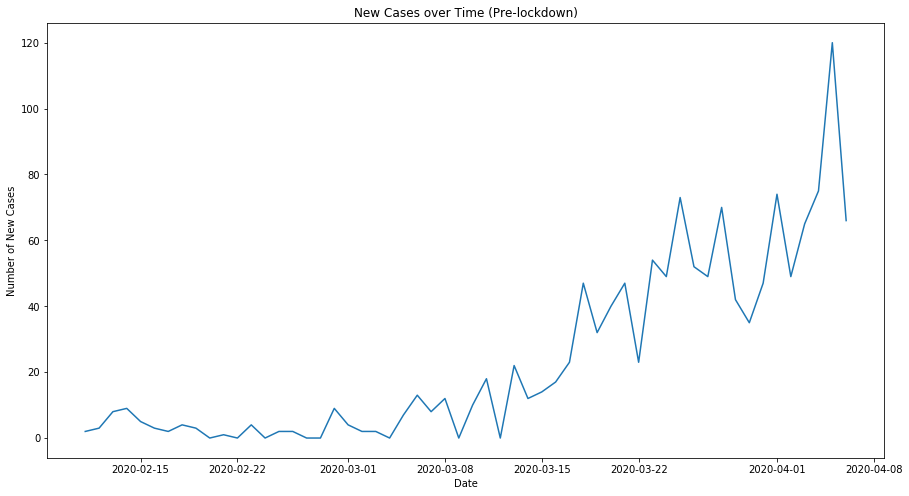

In [24]:
plt.figure(figsize = (15,8))
sns.lineplot(data = sg_prelockdown, x = "Date", y = "New").set(title = "New Cases over Time (Pre-lockdown)", ylabel = "Number of New Cases")
#plt.savefig("sg_pre.png")

#### Upon inspection, the trend appears to follow an exponential distribution. To obtain an equation, I will utilize 30 days before the start of the lockdown as well as the first 2 weeks of the lockdown.

In [25]:
forecast_df = sg_df[(sg_df["Date"] > "2020-03-07") & (sg_df["Date"] < "2020-04-21")]
day = []
for i in range(0, 44):
    day.append(i)
forecast_df["X"] = day
#forecast_df.to_excel("Forecast (SG).xlsx")

C:\Users\hakim\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### I exported the data into excel to obtain an exponential trendline equation. The equation obtained was as such:
$$ N = 8.7717e^{0.0928*t} $$
#### Here, N is the number of "New" cases and t is the number of days after "2020-03-07" (the first day used in forecast calculations). I could then proceed with forecasting the "New" cases during the lockdown period.

In [26]:
forecast = []
for i in range(30, 86):
    forecast.append(int(8.7717*np.exp(0.0982*i)))
sg_lockdown.loc[:,"Forecast"] = forecast

C:\Users\hakim\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\hakim\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


#### Now, we can proceed with plotting the "New" cases compared to the "Forecast" cases to visualize the impact of the lockdown in reducing the number of new cases

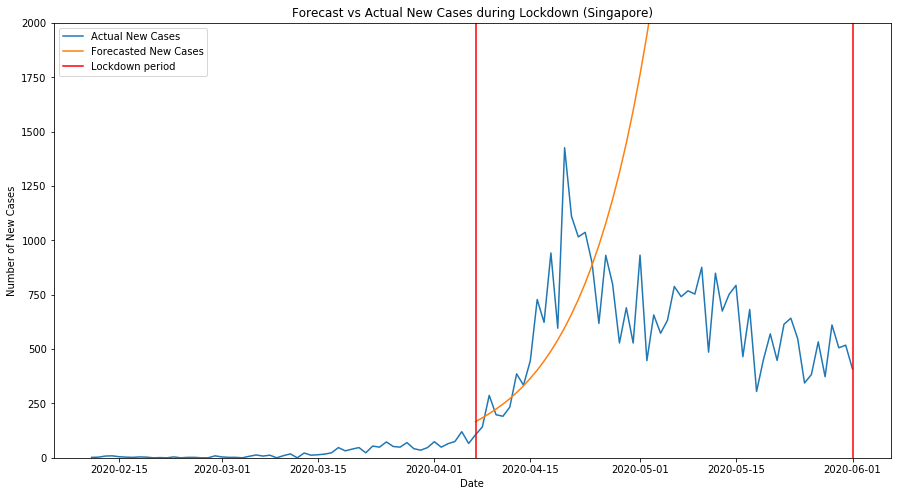

In [27]:
sg_combined = pd.concat([sg_prelockdown, sg_lockdown])

plt.figure(figsize = (15,8))
plt.plot(sg_combined["Date"], sg_combined["New"], label = "Actual New Cases")
plt.plot(sg_combined["Date"], sg_combined["Forecast"], label = "Forecasted New Cases")
plt.axvline(datetime.strptime("2020-04-07", "%Y-%m-%d"), color = "red", label = "Lockdown period")
plt.axvline(datetime.strptime("2020-06-01", "%Y-%m-%d"), color = "red")
plt.title("Forecast vs Actual New Cases during Lockdown (Singapore)")
plt.xlabel("Date")
plt.ylabel("Number of New Cases")
plt.ylim([0, 2000])
plt.legend()
#plt.savefig("final_sg.png")

### As analysed above, the lockdown appears to have been successful in reducing the rate of increase of new cases as the Actual New Cases showed a decreasing trend after a stabilisation period of around 1-2 weeks in the lockdown.

### Austria Lockdown 2 Analysis
- I repeat the previous pre-processing steps for a different context (Austria) as a comparison

In [28]:
atr_df = combined[combined["Country/Region"] == "Austria"]
atr_df["New"] = atr_df["Confirmed"] - atr_df["Confirmed"].shift(1)

C:\Users\hakim\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
atr_prelockdown = atr_df[(atr_df["Date"] > "2020-10-12") & (atr_df["Date"] < "2020-11-03")]
atr_lockdown = atr_df[(atr_df["Date"] > "2020-11-02") & (atr_df["Date"] < "2020-12-01")]

In [30]:
forecast_df = atr_df[(atr_df["Date"] > "2020-10-01") & (atr_df["Date"] < "2020-11-18")]
day = []
for i in range(0, 47):
    day.append(i)
forecast_df["X"] = day
#forecast_df.to_excel("Forecast (Austria).xlsx")

C:\Users\hakim\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### I exported the data into excel to obtain an exponential trendline equation. The equation obtained was as such:
$$ N = 655.76e^{0.0633*t} $$
#### Here, N is the number of "New" cases and t is the number of days after "2020-11-02" (the first day used in forecast calculations). I could then proceed with forecasting the "New" cases during the lockdown period.

In [31]:
forecast = []
for i in range(32, 60):
    forecast.append(int(655.76*np.exp(0.0633*i)))
atr_lockdown.loc[:,"Forecast"] = forecast

C:\Users\hakim\anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\hakim\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


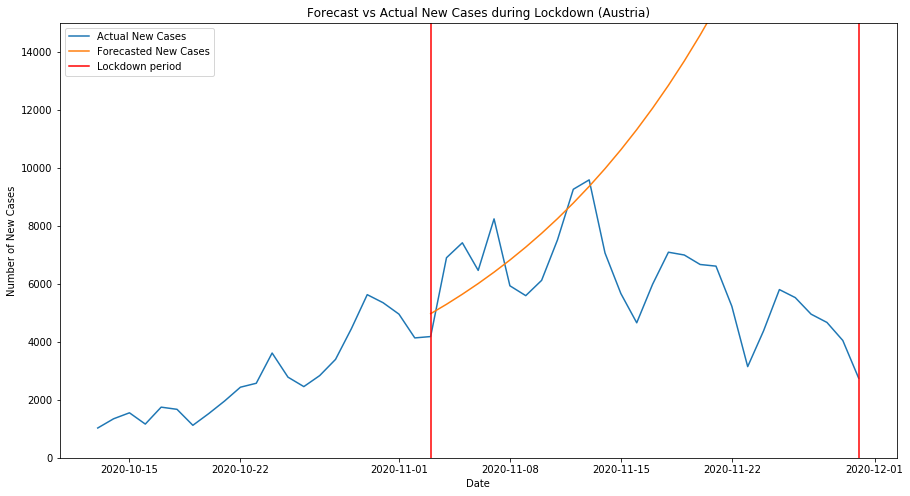

In [32]:
atr_combined = pd.concat([atr_prelockdown, atr_lockdown])

plt.figure(figsize = (15,8))
plt.plot(atr_combined["Date"], atr_combined["New"], label = "Actual New Cases")
plt.plot(atr_combined["Date"], atr_combined["Forecast"], label = "Forecasted New Cases")
plt.axvline(datetime.strptime("2020-11-03", "%Y-%m-%d"), color = "red", label = "Lockdown period")
plt.axvline(datetime.strptime("2020-11-30", "%Y-%m-%d"), color = "red")
plt.title("Forecast vs Actual New Cases during Lockdown (Austria)")
plt.xlabel("Date")
plt.ylabel("Number of New Cases")
plt.ylim([0, 15000])
plt.legend()
#plt.savefig("final_austria.png")

### Similar to the first lockdown analysis in Singapore, it appears that Austria's government has also successfully implemented a lockdown to quell the increasing number of new cases as can be seen by the Actual New Cases being less than the Forecasted New Cases.

### In conclusion, it appears that lockdowns being one of the most popular forms of restrictions implemented by governments is successful due to the 2 case studies in Singapore and Austria.

-------------------------------------------------------------------------------------------------------------------------------

## Analysis 2: Investigate the Impact of Selected Demographic Factors on Covid 19 Mortality Rate

### Covid 19 is known to be a form of respiratory illness. Does this mean that those with asthma or other such related chronic respiratory illnesses would be more immune than others? Or how about those living in areas with very poor air conditions?

## Analysis 2.1: Investigate the impact of countries' proportion of population with asthma with COVID 19 Mortality Rates
## Hypothesis: Countries with higher proportion of population with asthma would have higher COVID 19 Mortality Rates

### Plan:
1. Identify countries with high and low proportion of population with asthma
2. Calculate global mortality rate
3. Calculate identified countries mortality rate (as of "2021-05-29")
4. Create visualization of respective country and mortality rates

### Data Preparation:
1. Subset dataframe based on respective countries
2. If countries have multiple "Provinces", groupby "Date" and sum values for "Confirmed", "Deaths", "Recovered", "Active" cases
3. Calculate different mortality rates
4. Create labelled barplots to compare different countries with different proportion of population with asthma

### Proportion of Population with Asthma
- 3 High Asthma Proportion: Australia (21.5%), Sweden (20.2%), UK (18.2%)
- 3 Low Asthma Proportion: Turkey (2.06%), Bosnia and Herzegovina (1.4%), China (1.4%)
- (Obtained from: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3353191/)

In [33]:
global_final = combined.groupby("Date")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()
global_mr = round(global_final.iloc[-1, 1]/global_final.iloc[-1, 0] * 100, 2)

In [34]:
global_final.tail()

,Confirmed,Deaths,Recovered,Active
Date,,,,
2021-05-25,167848207,3485788,104824935,59537484
2021-05-26,168416423,3498544,105380748,59537131
2021-05-27,168970791,3511297,106078106,59381388
2021-05-28,169470725,3523117,106633069,59314539
2021-05-29,169951560,3533619,107140669,59277272


In [35]:
aus_df = combined[combined["Country/Region"]=="Australia"]
swe_df = combined[combined["Country/Region"]=="Sweden"]
uk_df = combined[combined["Country/Region"]=="UK"]

aus_final = aus_df.groupby("Date")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()
swe_final = swe_df.groupby("Date")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()
uk_final = uk_df.groupby("Date")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()

In [36]:
aus_mr = round(aus_final.iloc[-1, 1]/aus_final.iloc[-1, 0] * 100, 2)
swe_mr = round(swe_final.iloc[-1, 1]/swe_final.iloc[-1, 0] * 100, 2)
uk_mr = round(uk_final.iloc[-1, 1]/uk_final.iloc[-1, 0] * 100, 2)

In [37]:
tu_df = combined[combined["Country/Region"]=="Turkey"]
bh_df = combined[combined["Country/Region"] == 'Bosnia and Herzegovina']
ch_df = combined[(combined["Country/Region"]=="China") | (combined["Country/Region"]=="Mainland China")]
ch_final = ch_df.groupby("Date")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()

In [38]:
tu_mr = round(tu_df.iloc[-1, 5]/tu_df.iloc[-1, 4] * 100, 2)
bh_mr = round(bh_df.iloc[-1, 5]/bh_df.iloc[-1, 4] * 100, 2)
ch_mr = round(ch_final.iloc[-1, 1]/ch_final.iloc[-1, 0] * 100, 2)

In [39]:
mr_data = {"Global":global_mr, "Australia":aus_mr, "Sweden":swe_mr, "UK":uk_mr, "Turkey": tu_mr, "Bosnia and Herzagovina":bh_mr, "China":ch_mr}
mr_df = pd.DataFrame.from_dict(mr_data.items())
mr_df = mr_df.rename(columns = {0: "Country/Region", 1: "Mortality Rate"}) 
mr_df.loc[:, "Asthma"] = ["NA", "High Proportion of Asthma", "High Proportion of Asthma", "High Proportion of Asthma", "Low Proportion of Asthma", "Low Proportion of Asthma", "Low Proportion of Asthma"]

Text(0.5, 1.0, 'Mortality Rate of Countries with Differing Proportion of Population with Asthma')

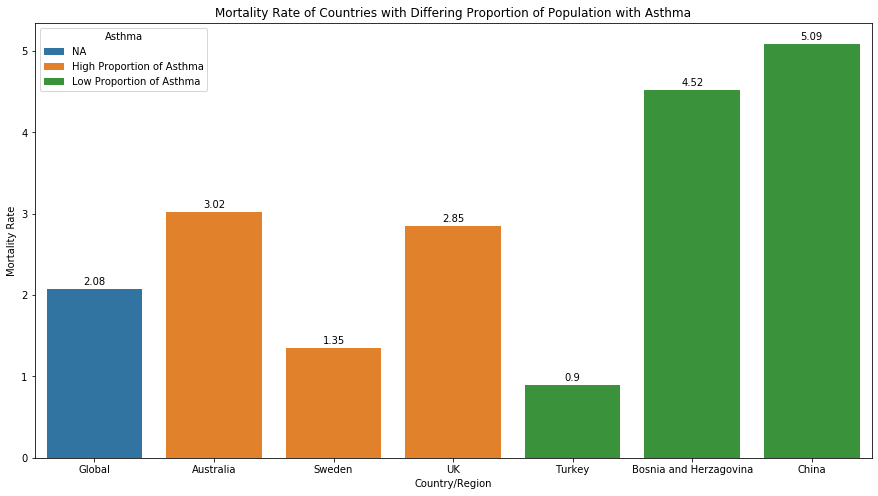

In [40]:
plt.figure(figsize =(15, 8))
ax = sns.barplot(data = mr_df, x = "Country/Region", y = "Mortality Rate", hue = "Asthma", dodge = False)

for index, row in mr_df.iterrows():
    ax.text(index, row[1]+0.05, row[1], color='black', ha="center")
    
plt.title("Mortality Rate of Countries with Differing Proportion of Population with Asthma")
#plt.savefig("asthma_mortality.png")

### Based on the bar plot, it is inconclusive whether the proportion of population with asthma contributes to a higher mortality rate. One failure of my modelling process would be the lack of information with regards to the proportion of these cases where the patient exhibits asthma conditions. As such, we would be unable to directly correlate this factor with mortality rate.

## Analysis 2.2: Investigate the impact of countries' air conditions with COVID 19 Mortality Rates
## Hypothesis: Countries with poor air conditions would have higher COVID 19 Mortality Rates

### Plan:
1. Identify countries with poor and good air conditions
2. Calculate global mortality rate
3. Calculate identified countries mortality rate (as of "2021-05-29")
4. Create visualization of respective country and mortality rates

### Data Preparation:
1. Subset dataframe based on respective countries
2. If countries have multiple "Provinces", groupby "Date" and sum values for "Confirmed", "Deaths", "Recovered", "Active" cases
3. Calculate different mortality rates
4. Create labelled barplots to compare different countries with different level of air conditions

### Countries with Adverse Air Conditions 
- 3 Worst Air Quality: India, Bangladesh, Mongolia
- 3 Good Air Quality: Poland, Italy, Republic of Korea
- (Obtained from: https://en.wikipedia.org/wiki/List_of_most-polluted_cities_by_particulate_matter_concentration)

In [41]:
global_final = combined.groupby("Date")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()
global_mr = round(global_final.iloc[-1, 1]/global_final.iloc[-1, 0] * 100, 2)

In [42]:
ind_df = combined[combined["Country/Region"]=="India"]
ba_df = combined[combined["Country/Region"]=="Bangladesh"]
mo_df = combined[combined["Country/Region"]=="Mongolia"]

ind_final = ind_df.groupby("Date")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()

In [43]:
ind_final.tail()

,Confirmed,Deaths,Recovered,Active
Date,,,,
2021-05-25,27157795,311388,24350816,2495591
2021-05-26,27369093,315235,24633951,2419907
2021-05-27,27555457,318895,24893410,2343152
2021-05-28,27729247,322512,25178011,2228724
2021-05-29,27894800,325972,25454320,2114508


In [44]:
ind_mr = round(ind_final.iloc[-1, 1]/ind_final.iloc[-1, 0] * 100, 2)
ba_mr = round(ba_df.iloc[-1, 5]/ba_df.iloc[-1, 4] * 100, 2)
mo_mr = round(mo_df.iloc[-1, 5]/mo_df.iloc[-1, 4] * 100, 2)

In [45]:
po_df = combined[combined["Country/Region"]=="Poland"]
it_df = combined[combined["Country/Region"]=="Italy"]
kr_df = combined[combined["Country/Region"]=="South Korea"]

it_final = it_df.groupby("Date")[["Confirmed", "Deaths", "Recovered", "Active"]].sum()

In [46]:
po_mr = round(po_df.iloc[-1, 5]/po_df.iloc[-1, 4] * 100, 2)
it_mr = round(it_final.iloc[-1, 1]/it_final.iloc[-1, 0] * 100, 2)
kr_mr = round(kr_df.iloc[-1, 5]/kr_df.iloc[-1, 4] * 100, 2)

In [47]:
mr_data = {"Global":global_mr, "India":ind_mr, "Bangladesh":ba_mr, "Mongolia":mo_mr, "Poland": po_mr, "Italy":it_mr, "South Korea":kr_mr}
mr_df = pd.DataFrame.from_dict(mr_data.items())
mr_df = mr_df.rename(columns = {0: "Country/Region", 1: "Mortality Rate"}) 
mr_df.loc[:, "Air Quality"] = ["NA", "Bad", "Bad", "Bad", "Good", "Good", "Good"]

Text(0.5, 1.0, 'Mortality Rate of Countries with Differing Air Quality')

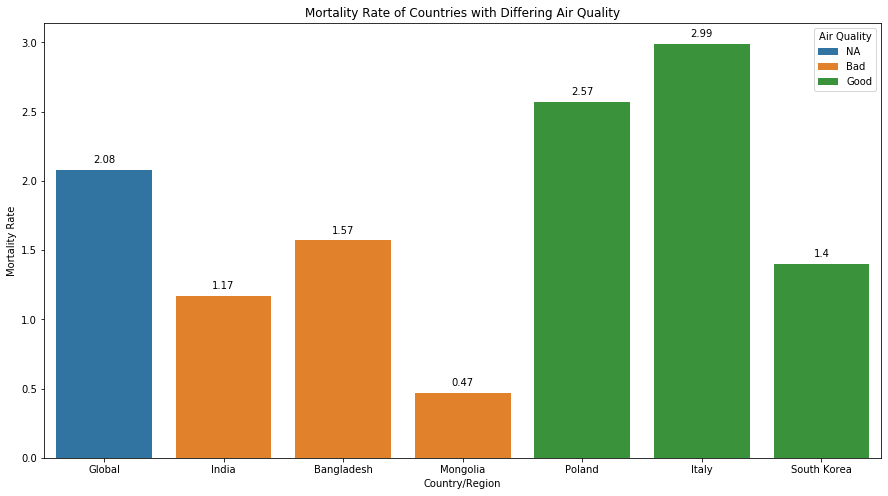

In [48]:
plt.figure(figsize =(15, 8))
ax = sns.barplot(data = mr_df, x = "Country/Region", y = "Mortality Rate", hue = "Air Quality", dodge = False)

for index, row in mr_df.iterrows():
    ax.text(index, row[1]+0.05, row[1], color='black', ha="center")
    
plt.title("Mortality Rate of Countries with Differing Air Quality")
#plt.savefig("air_mortality.png")

### Again, it appears that the impact of air quality on mortality rate is inconclusive as the above examples show that countries with worse air quality have lower mortality rates than countries with good air quality. This is surprising so I conducted some further research into the topic and found a relevant blogpost (https://www.lung.org/blog/covid-19-mortality-and-air-pollution). In the blogpost, it is mentioned that increased exposure to particle pollution does cause an increase in the COVID 19 mortality rate. Perhaps a reason this analysis was unable to record a similar conclusion was due to me joining the different provinces into 1 country. The provinces may have different air quality from one another and a better approach would be to obtain province specific air quality data and conduct analysis based on these high or low air quality provinces